# Bagging

# what is bagging
* Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once


* Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train

![](bag.png)


**Output side called as  Aggregation**

**For regression task it will take average**



**For classification it will count the output** 

## How bagging works

#### Bootstrapping:
*  Bagging leverages a bootstrapping sampling technique to create diverse samples. This resampling method generates different subsets of the training dataset by selecting data points at random and with replacement. This means that each time you select a data point from the training dataset, you are able to select the same instance multiple times. As a result, a value/instance repeated twice (or more) in a sample.

#### Parallel training:
* These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.

#### Aggregation:
* Finally, depending on the task (i.e. regression or classification), an average or a majority of the predictions are taken to compute a more accurate estimate. In the case of regression, an average is taken of all the outputs predicted by the individual classifiers; this is known as soft voting. For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

## Benefits :

#### Ease of implementation: 
* Python libraries such as scikit-learn (also known as sklearn) make it easy to combine the predictions of base learners or estimators to improve model performance.

#### Reduction of variance:
* Bagging can reduce the variance within a learning algorithm. This is particularly helpful with high-dimensional data, where missing values can lead to higher variance, making it more prone to overfitting and preventing accurate generalization to new datasets.


## challenges of bagging:


#### Computationally expensive:
* Bagging slows down and grows more intensive as the number of iterations increase. Clustered systems or a large number of processing cores are ideal for quickly creating bagged ensembles on large test sets.



## First we will see Using single model

## Business case: Predicting  quality of wine with given feature.

In [1]:
#importing package and loading data
import pandas as pd
import numpy as np
data=pd.read_csv('wine.csv')

# Basic check

In [2]:
data.head()#first five rows

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.tail()#last 5 rows

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
data.info()# to know datatype and null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc. 

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.describe(include=['O'])#It will give you info about categorical data/columns

In [59]:
data.shape#rows and columns

(178, 14)

# EDA

### Renaming the columns

In [60]:
data.rename(columns={'Wine':'wine','Alcohol':'alcohol','Alcalinity of ash':'AOA','Total phenols':'total_phe',
                     'Nonflavanoid phenols':'NOP','Color intensity':'color_intensity','Hue':'hu',
                     'OD280/OD315 of diluted wines':'DW','Malic acid':'M_acid'},inplace=True)
#renaming all columns

In [61]:
box1=data[['M_acid','Ash','AOA','Magnesium','Proanthocyanins','color_intensity','hu']]

In [62]:
data.head()#first 5 rows

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
#importing package
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
#creation of data frame which continuous variable
box=data[['alcohol','M_acid','Ash','AOA','Magnesium','total_phe','Flavanoids','NOP','Proanthocyanins','color_intensity','hu','DW','Proline']]

## checking distribution

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

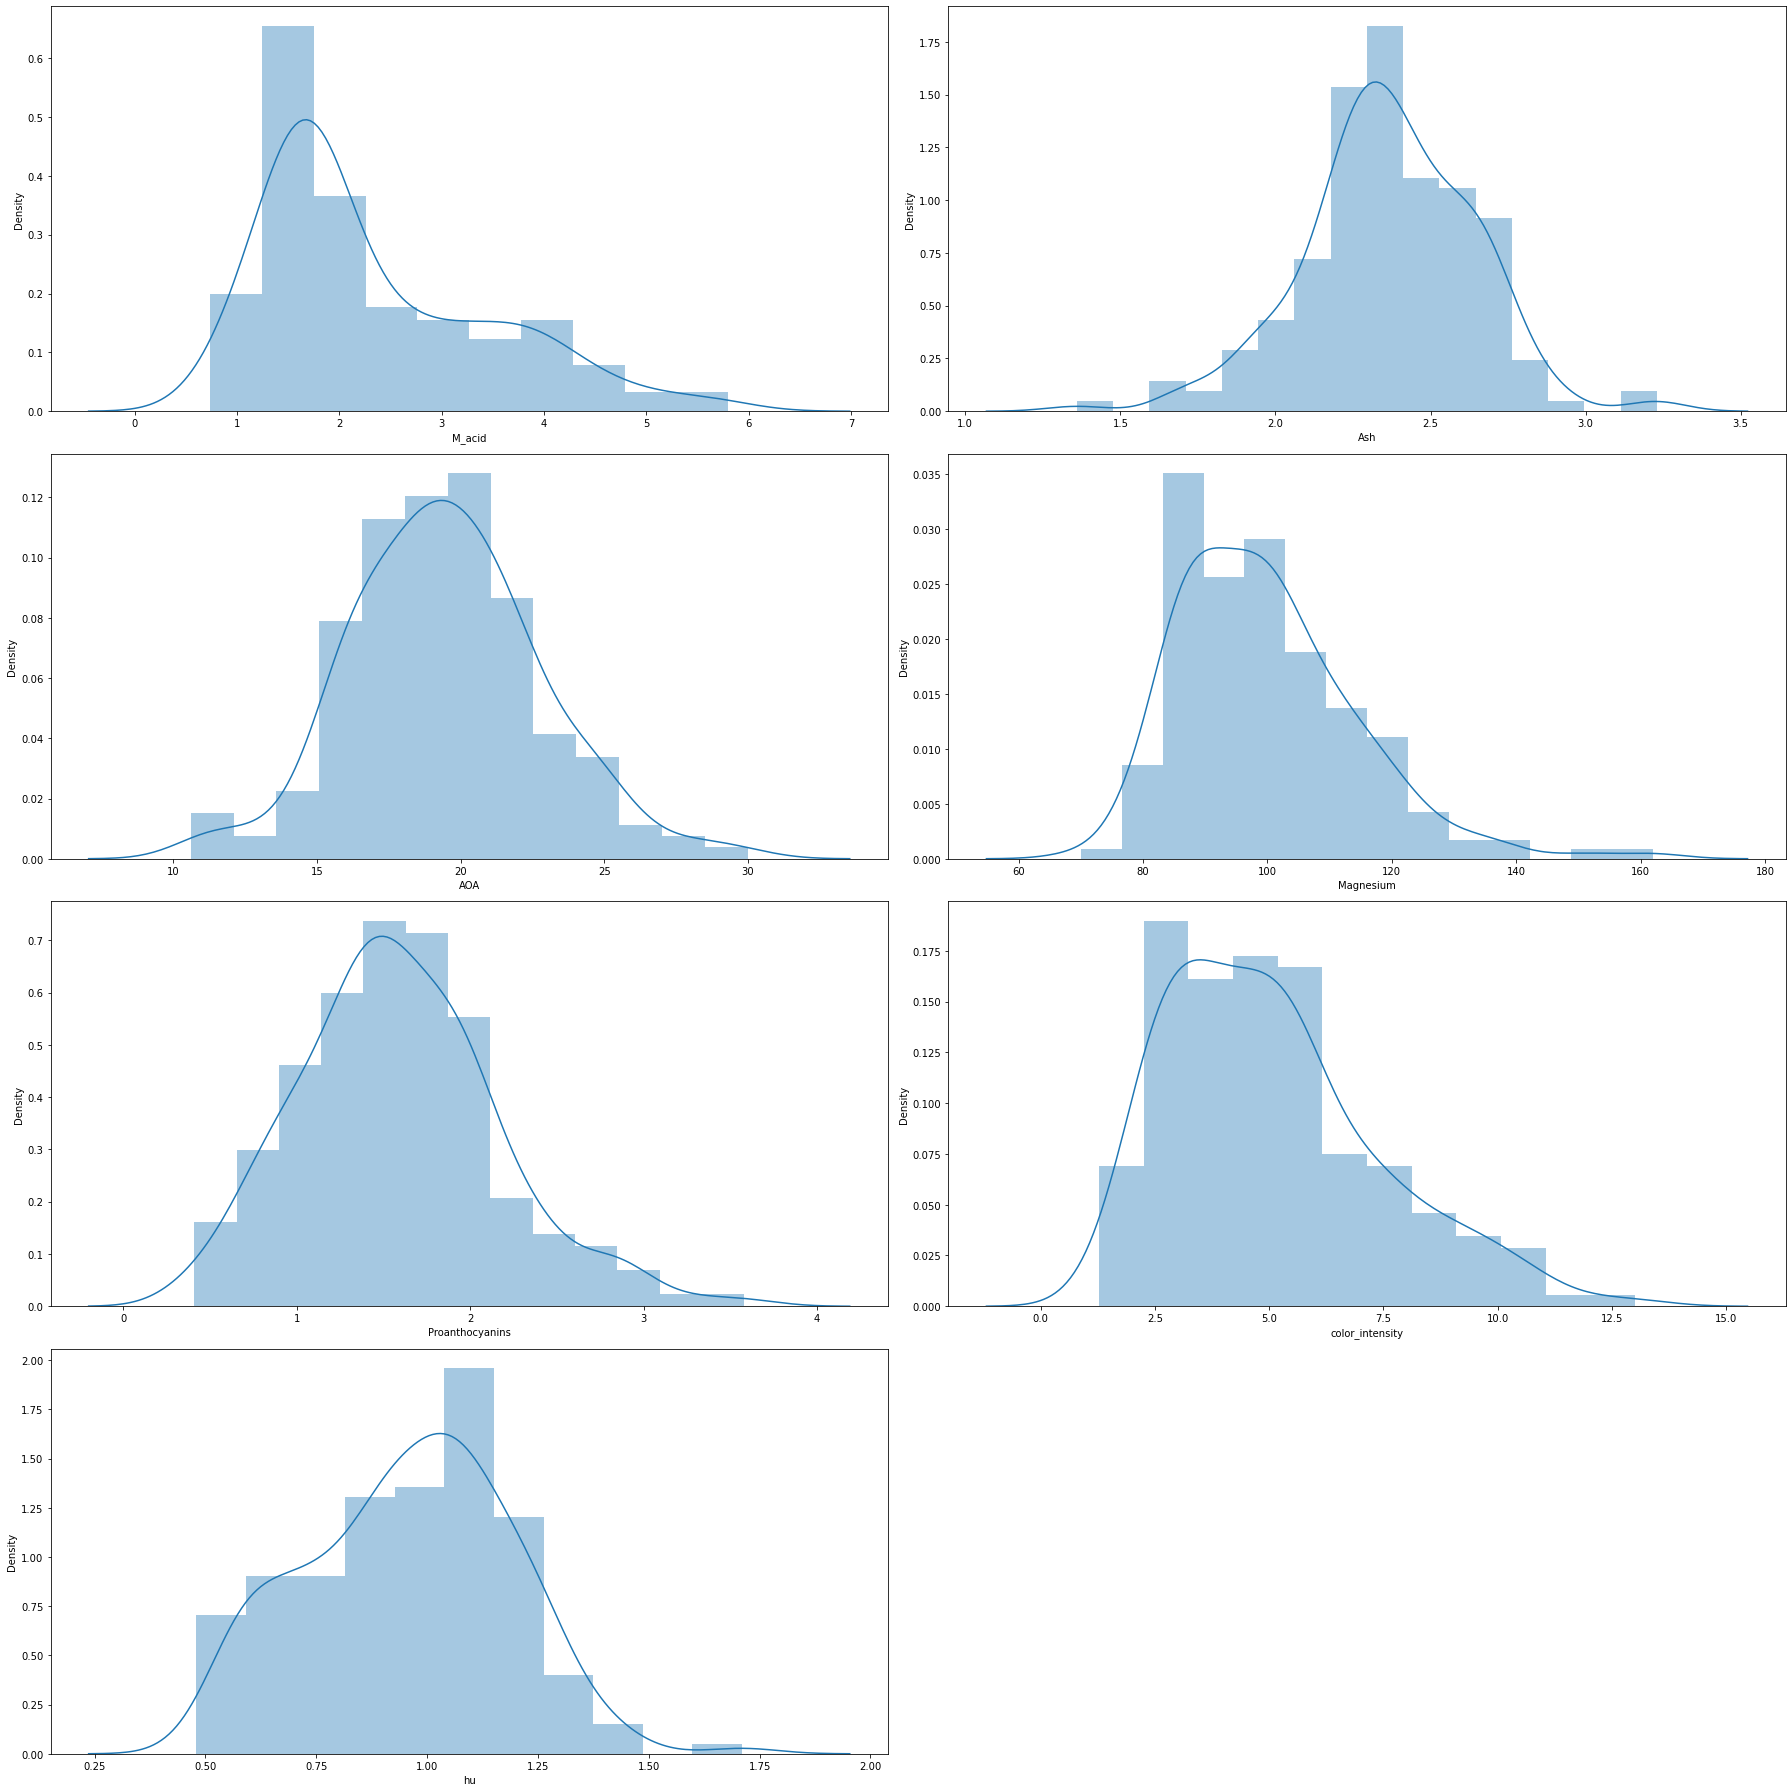

In [65]:
plt.figure(figsize=(25,25),facecolor='white')#canvas size
plotnum=1#counter
for c in box1:#columns form dataFrame
    if(plotnum<9):#checking whether counter less than 9
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()    

# Bivariant Anaylsis

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')#canvas size
plotnum=1#counter
for c in box1:#columns form dataFrame
    if(plotnum<9):#checking whether counter less than 9
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.histplot(box[c],hue=data.Wine)#to know relation between target and variable
    plotnum+=1#increment counter
plt.tight_layout()   

# Data preprocessing

# 1.checking null values 

In [70]:
data.isnull().sum()

wine               0
alcohol            0
M_acid             0
Ash                0
AOA                0
Magnesium          0
total_phe          0
Flavanoids         0
NOP                0
Proanthocyanins    0
color_intensity    0
hu                 0
DW                 0
Proline            0
dtype: int64

## 2.conversion of categorical columns into numerical columns

In [71]:
for c in data.columns:#columns form datasets
    if(data[c].dtype==object):#checking datatype of labels
        print(c)#categorical columns



## 3.checking constant columns,check wether std =0

## 4.checking outlier

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\

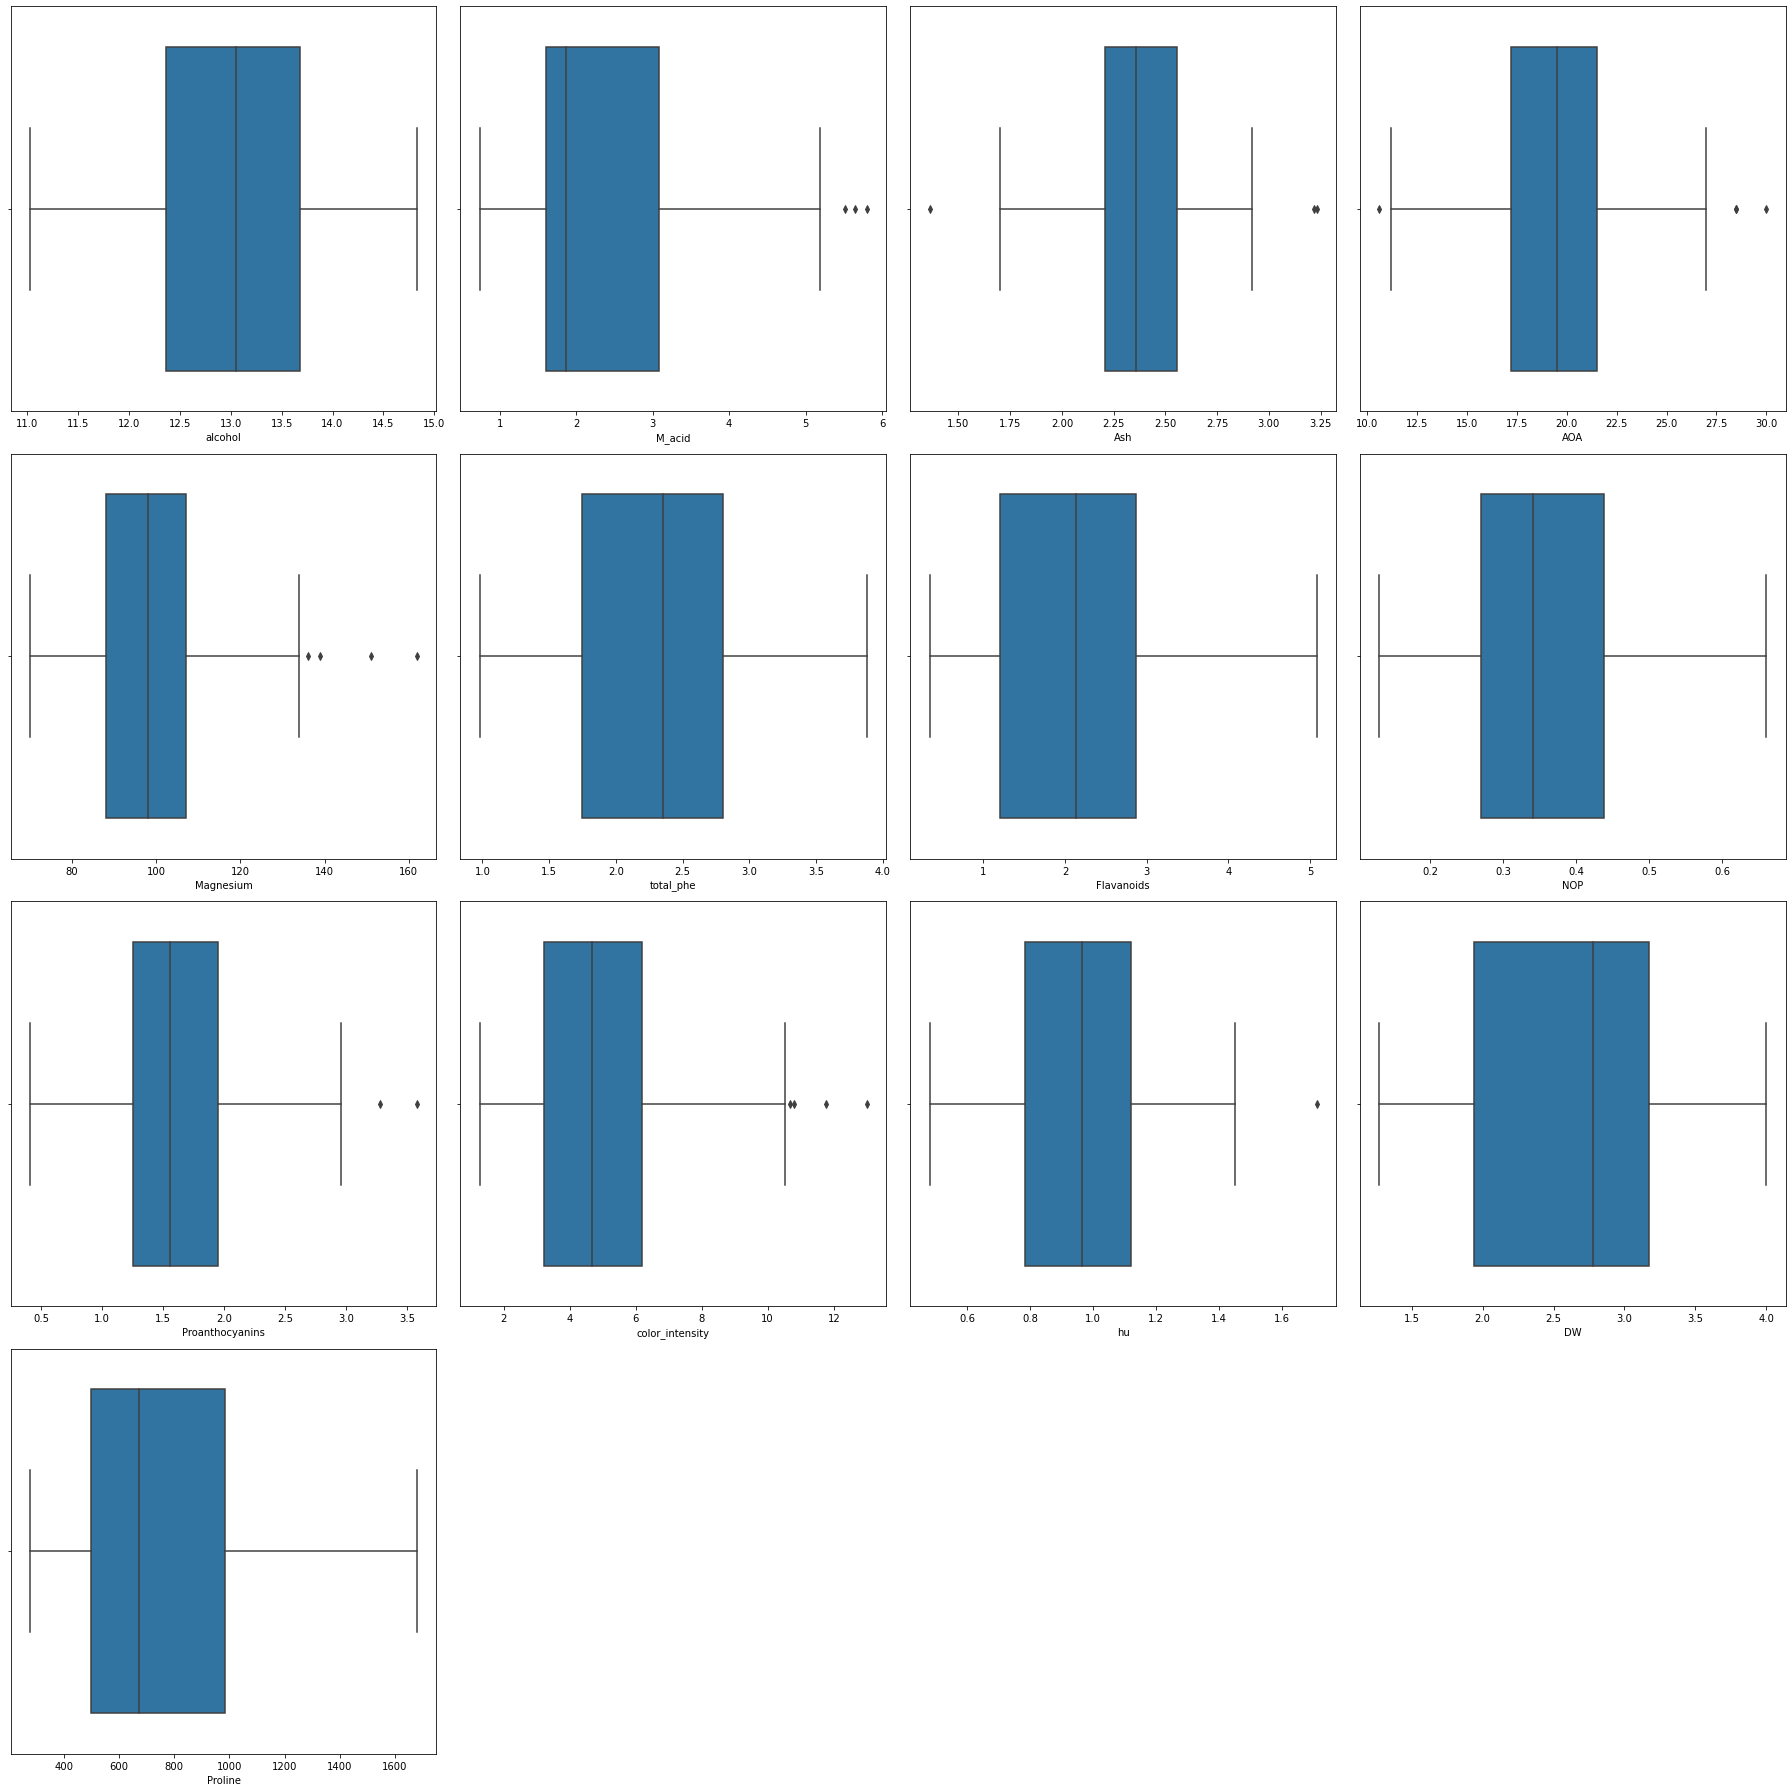

In [72]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(box[c])
    plotnum+=1
plt.tight_layout()    

# Outlier Handling

# M_acid

In [79]:
#outlier handling for M_acid and its not a normal so we use IQR range
from scipy import stats#import stats to calculat mode


In [80]:
IQR = stats.iqr(data.M_acid, interpolation = 'midpoint') #calculating Inter quantile range

IQR

1.46

In [85]:
IQR = stats.iqr(data.M_acid, interpolation = 'midpoint') #calculating Inter quantile range

IQRum limit


SyntaxError: invalid syntax (Temp/ipykernel_24732/3952677400.py, line 3)

In [25]:
print(min_limit,max_limit)

-0.5874999999999999 5.2725


In [26]:
data.loc[data['M_acid']<min_limit] #checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [27]:
data.loc[data['M_acid']>max_limit]#checking values which are greater than maximum limit


,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [29]:
data.loc[data['M_acid']>max_limit]#checking whether outlier remove or not

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


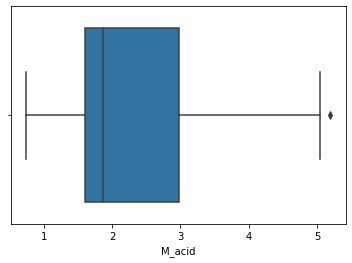

In [30]:
sns.boxplot(data.M_acid)#boxplot to check outlier
plt.show()

# Ash

### Using 3 sigma rule

In [ ]:
# for ash we will use 3 sigma rule 
lower_limit=data.Ash.mean() - 3*data.Ash.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Ash.mean() + 3*data.Ash.std()#calculating upper limit
upper_limit

In [ ]:
data.loc[data['Ash']<lower_limit]#checking values which are less than minimum limit

In [ ]:
data.loc[data['Ash']<lower_limit,'Ash']=np.mean(data.Ash)

In [34]:
data.loc[data['Ash']<lower_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [35]:
data.loc[data['Ash']>upper_limit]#checking values which are greater than maximum limit

 

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [36]:
data.loc[data['Ash']>upper_limit,'Ash']=np.mean(data.Ash)#imputing value with mean

In [37]:
data.loc[data['Ash']>upper_limit]#recheck

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


# AOA this is a normally distrubuted using 3 sigma rule

In [26]:
data.sort_values('AOA')

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
14,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
50,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
157,3,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [27]:
lower_limit=data.AOA.mean() - 3*data.AOA.std()##calculating lower limit
print(lower_limit)

upper_limit=data.AOA.mean() + 3*data.AOA.std()#calculating upper limit
upper_limit

9.476252518704204


29.513635121745235

In [28]:
data.loc[data['AOA']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [29]:
data.loc[data['AOA']<lower_limit,'AOA']=np.median(data.AOA)#imputing value with median


In [30]:
data.loc[data['AOA']<lower_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [31]:
data.loc[data['AOA']>upper_limit]#checking values which are greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
73,2,12.99,1.67,2.6,30.0,139,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985


In [32]:
data.loc[data['AOA']>upper_limit,'AOA']=np.mean(data.AOA)#imputing value with mean

In [33]:
data.loc[data['AOA']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


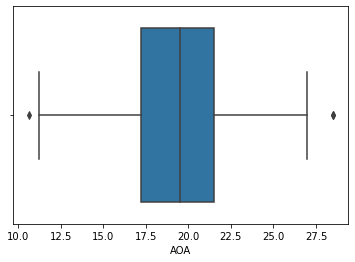

In [34]:
sns.boxplot(data.AOA)
plt.show()

In [35]:
data.AOA=(data.AOA)

# Magnesium is normal curve so using 3 sigma rule

In [36]:
lower_limit=data.Magnesium.mean() - 3*data.Magnesium.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Magnesium.mean() + 3*data.Magnesium.std()#calculating upper limit
upper_limit

56.89412248782086


142.58902357959488

In [37]:
data.loc[data['Magnesium']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [38]:
data.loc[data['Magnesium']>upper_limit]#checking values which are  greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [39]:
data.loc[data['Magnesium']>upper_limit,'Magnesium']=np.mean(data.Magnesium)#imputing values using mean

In [40]:
data.loc[data['Magnesium']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


### Proanthocyanins

In [41]:
# for ash we will use 3 sigma rule 
lower_limit=data.Proanthocyanins.mean() - 3*data.Proanthocyanins.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Proanthocyanins.mean() + 3*data.Proanthocyanins.std()#calculating upper limit
upper_limit

-0.12617771161978797


3.307975464428779

In [42]:
data.loc[data['Proanthocyanins']<lower_limit]#c

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [43]:
data.loc[data['Proanthocyanins']>upper_limit]#c

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
110,2,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [44]:
data.loc[data['Proanthocyanins']>upper_limit,'Proanthocyanins']=np.mean(data.Proanthocyanins)#imputing values using mean

In [45]:
data.loc[data['Proanthocyanins']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


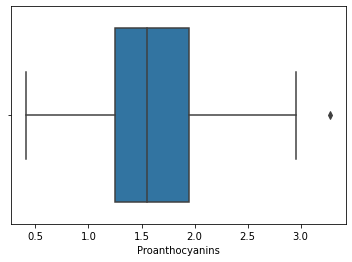

In [46]:
sns.boxplot(data.Proanthocyanins)
plt.show()

## Using IQR

In [47]:
#outlier handling for M_acid and its not a normal so we use IQR range
from scipy import stats#import stats to calculat mode


In [48]:
IQR = stats.iqr(data.Proanthocyanins, interpolation = 'midpoint') #calculating Inter quantile range

IQR

1.46

In [5]:
IQR = stats.iqr(data.Proanthocyanins, interpolation = 'midpoint') #calculating Inter quantile range

IQR limit


SyntaxError: invalid syntax (Temp/ipykernel_9696/3307144060.py, line 3)

In [82]:
print(min_limit,max_limit)

NameError: name 'min_limit' is not defined

In [52]:
data.loc[data['Proanthocyanins']<min_limit] 

NameError: name 'min_limit' is not defined

In [ ]:
data.loc[data['Proanthocyanins']>max_limit]#checking values which are greater than maximum limit


In [ ]:
data.loc[data['Proanthocyanins']>max_limit,'Proanthocyanins']=np.median(data.Proanthocyanins)#imputing value with median

In [ ]:
data.loc[data['Proanthocyanins']>max_limit]#checking whether outlier remove or not

In [ ]:
sns.boxplot(data.Proanthocyanins)#boxplot to check outlier
plt.show()

### Feature Selection

<AxesSubplot:>

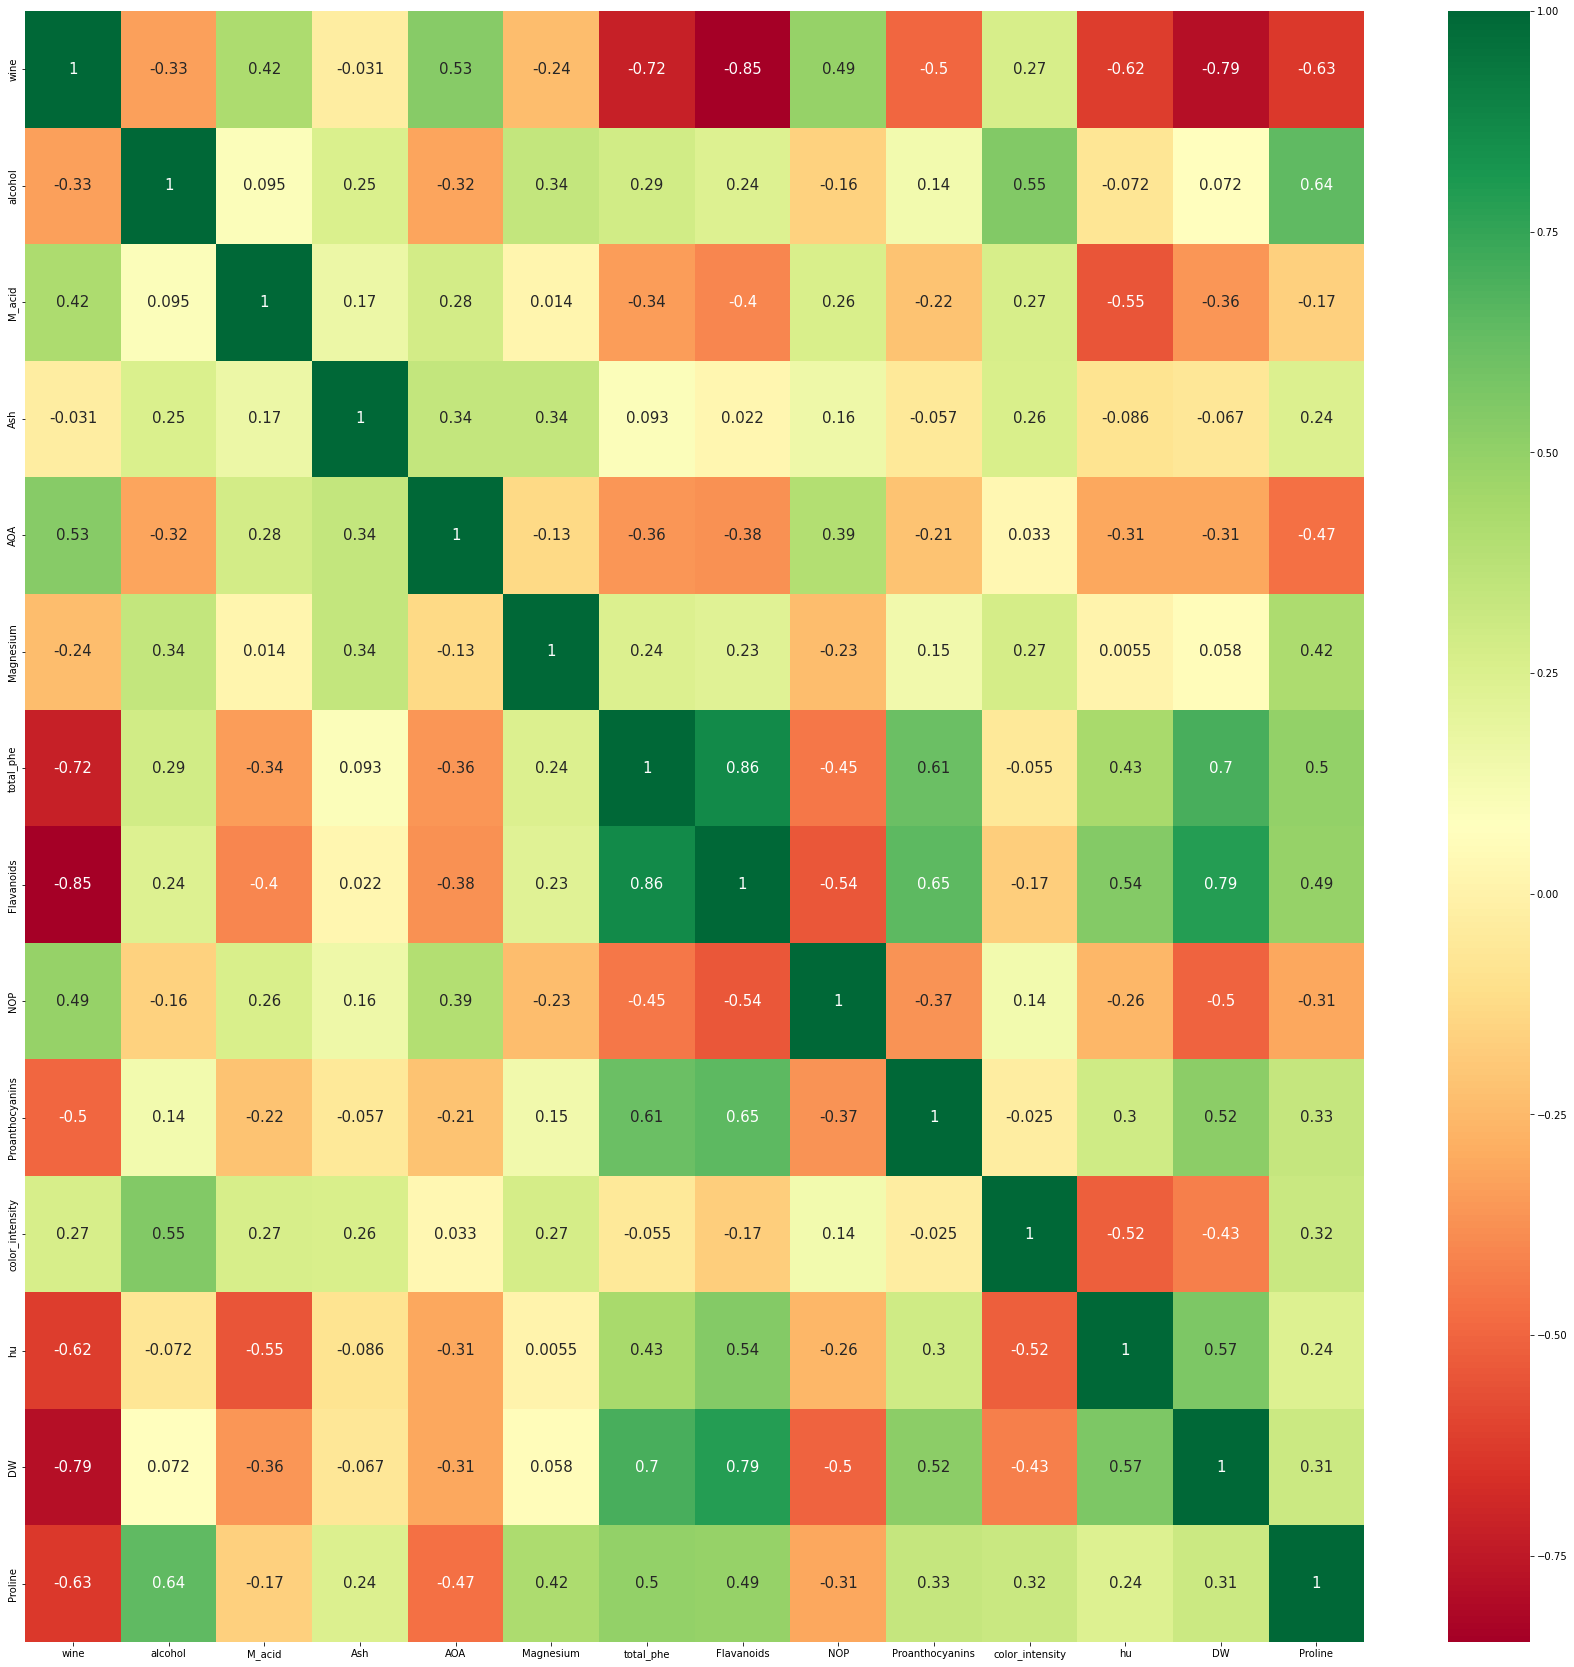

In [56]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

# Model building


In [57]:
## Creating independent and dependent variable
X=data.iloc[:,1:]
y=data.wine

In [58]:
### creating train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
## checking the train and test shape
X_test.shape

(45, 13)

In [60]:
y_test.shape

(45,)

In [61]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [62]:
from sklearn.metrics import f1_score 
f1_knn=f1_score(y_test,y_hat_knn,average='weighted')#checking model performance 
f1_knn

0.7111111111111111

## Using bagging


In [63]:
from sklearn.ensemble import BaggingClassifier#import bagging 
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [64]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted') ## f1  score calculation

In [65]:
f1_bagg#score after bagging

0.7148315736551031